### **Questão 4 - Predição com Rede NARX**

Utilize a rede neural perceptron de múltiplas camadas do tipo **NARX** (rede recorrente) para fazer a **predição de um passo** 𝑥^(𝑛+1) da série temporal:


x(n) = $\sqrt{1 + \sin(n + \sin^2(n))}$, n=0,1,2,3,...


1. Gere um conjunto de amostras para treinamento e outro para teste.  
2. Treine a rede para prever x^(n+1).  
3. Mostre:
   - A curva da série temporal original;
   - A curva da predição;
   - A curva do erro de predição: e(n+1) = x(n+1) - x^(n+1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## **Gerar a série temporal:**

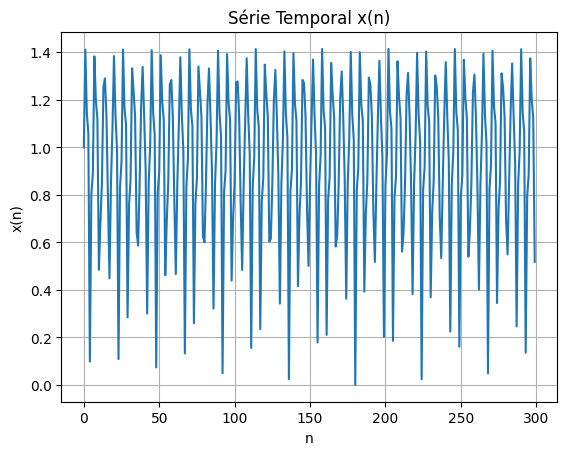

In [ ]:
# Gerar a série temporal
def gerar_serie(n_samples=300):
    n = np.arange(n_samples)
    x = np.sqrt(1 + np.sin(n + np.sin(n)**2))
    return x

serie = gerar_serie()
plt.plot(serie)
plt.title("Série Temporal x(n)")
plt.xlabel("n")
plt.ylabel("x(n)")
plt.grid()
plt.show()


## **Preparar os dados para a rede NARX:**

In [ ]:
def criar_dados_narx(serie, lag=5):
    X, y = [], []
    for i in range(lag, len(serie)-1):
        X.append(serie[i-lag:i]) #entrada para valores passados
        y.append(serie[i+1]) #saida para o valor futuro
    return np.array(X), np.array(y)

# Definir atraso (lags)
lag = 5
X, y = criar_dados_narx(serie, lag)

# Normalizar
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #shuffle=False para não embaralhar os dados


## **Construção e treinamento da rede:**


In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(lag,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # saída escalar x^(n+1)

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Previsão e visualização dos dados:**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


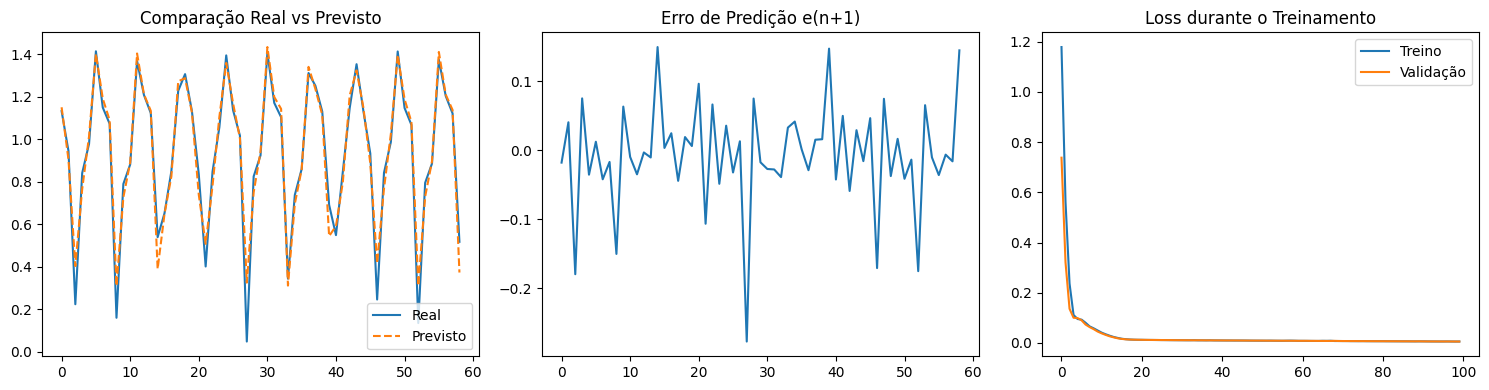

In [ ]:
# Previsão
y_pred = model.predict(X_test).flatten()

# Erro de predição
erro = y_test - y_pred

# Gráficos
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Previsto', linestyle='dashed')
plt.title('Comparação Real vs Previsto')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(erro)
plt.title('Erro de Predição e(n+1)')

plt.subplot(1, 3, 3)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss durante o Treinamento')
plt.legend()

plt.tight_layout()
plt.show()
